In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix

In [4]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\Identify Fake Job Posting.csv")

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
df.shape

(17880, 18)

In [6]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
columns = ['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range' , 'employment_type']
for n in columns:
    del df[n]

In [8]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
df.fillna('',inplace=True)

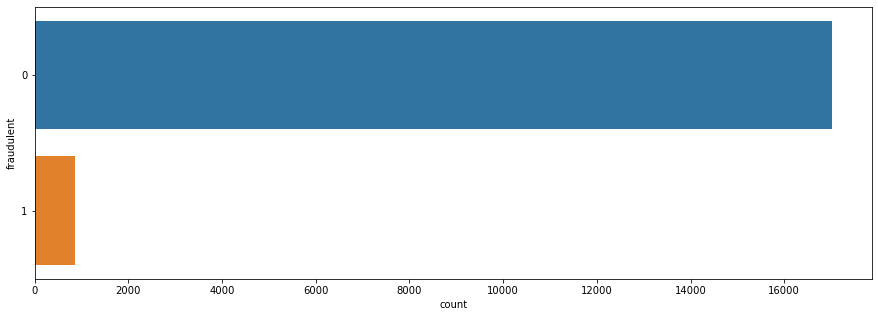

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent', data=df)
plt.show()

In [11]:
df.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [12]:
exp = dict(df.required_experience.value_counts())
del exp['']

In [13]:
exp

{'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

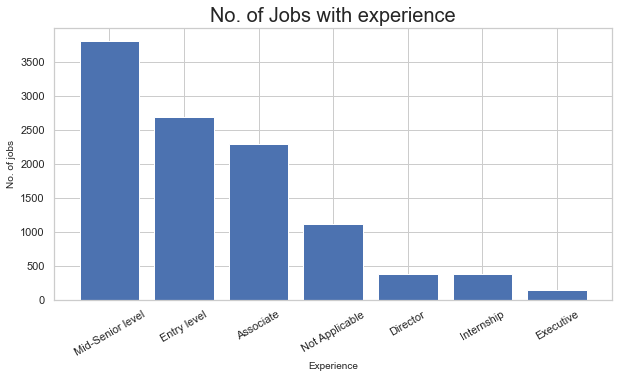

In [14]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
plt.bar(exp.keys(), exp.values())
plt.title('No. of Jobs with experience', size=20)
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=30)
plt.show()

In [15]:
def split(location):
    l = location.split(',')
    return l[0]
df['country'] = df.location.apply(split)

In [16]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [17]:
countr = dict(df.country.value_counts()[:14])
del countr['']
countr

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132,
 'NL': 127,
 'BE': 117,
 'IE': 114,
 'SG': 80}

Text(0.5, 0, 'Countries')

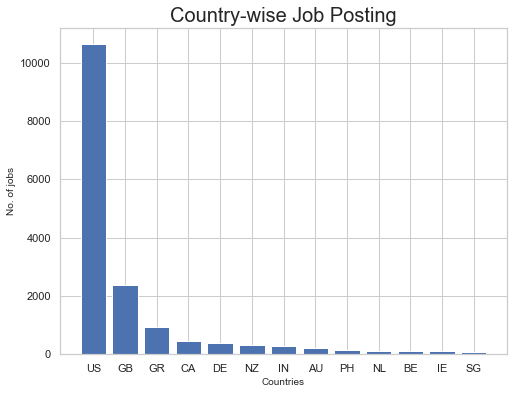

In [18]:
plt.figure(figsize=(8,6))
plt.title('Country-wise Job Posting', size=20)
plt.bar(countr.keys(), countr.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

In [19]:
edu = dict(df.required_education.value_counts()[:7])
del edu['']
edu

{"Bachelor's Degree": 5145,
 'High School or equivalent': 2080,
 'Unspecified': 1397,
 "Master's Degree": 416,
 'Associate Degree': 274,
 'Certification': 170}

Text(0.5, 0, 'Education')

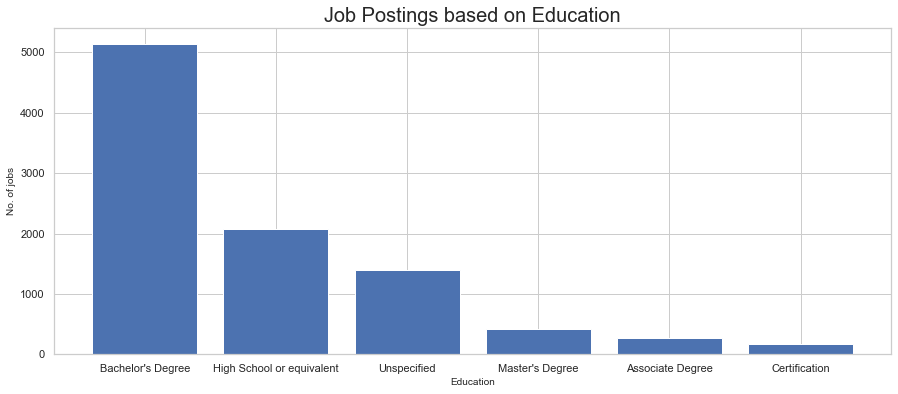

In [20]:
plt.figure(figsize=(15,6))
plt.title('Job Postings based on Education', size=20)
plt.bar(edu.keys(), edu.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Education', size=10)

In [21]:
print(df[df.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [22]:
df['text'] = df['title']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']
del df['country']

In [23]:
df.head(5)

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


In [24]:
Y = df.iloc[:,-1]
X = df.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12516, 1)
(12516,)
(5364, 1)
(5364,)


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
my_model = LogisticRegression()

In [ ]:
result = my_model.fit(X_train, y_train)

In [ ]:
predictions = result.predict(X_test)
predictions

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, predictions)

In [ ]:
print("Classification Report\n")
print(classification_report(y_test, predictions))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, predictions))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
my_model = DecisionTreeClassifier(random_state=0)
result = my_model.fit(X_train, y_train)

In [ ]:
predictions = result.predict(X_test)
predictions

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,predictions)

In [ ]:
print("Classification Report\n")
print(classification_report(y_test, predictions))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, predictions))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
model = rfc.fit(X_train,y_train)

In [ ]:
X_test

In [ ]:
pred =rfc.predict(X_test)
score = accuracy_score(y_test,pred)
score

In [ ]:
print("Classification Report\n")
print(classification_report(y_test, pred))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
my_model = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
result = my_model.fit(X_train,y_train)

In [ ]:
predictions = result.predict(X_test)
predictions

In [106]:
print('With KNN (k=3) accuracy is: ', result.score(X_test, y_test))

With KNN (k=3) accuracy is:  0.970917225950783


In [107]:
print("Classification Report\n")
print(classification_report(y_test, predictions))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, predictions))

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5073
           1       0.85      0.57      0.68       291

    accuracy                           0.97      5364
   macro avg       0.91      0.78      0.83      5364
weighted avg       0.97      0.97      0.97      5364

Confusion Matrix

[[5043   30]
 [ 126  165]]


In [108]:
from sklearn.svm import SVC
my_model = SVC(kernel = 'rbf', random_state = 0)
result = my_model.fit(X_train, y_train)

In [109]:
predict = result.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
from sklearn import metrics
print("Accuracy : ",metrics.accuracy_score(y_test,predict))

Accuracy :  0.9627143922445935


<AxesSubplot:>

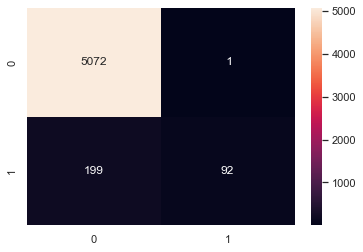

In [116]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test,predict)
sn.heatmap(cm,annot=True,fmt='2.0f')